# COMP24111 - Exercise 2: News Article Classification

## 1. Task description

You will work on a news article classification task.
The provided dataset includes a total of 800 articles taken from Reuters newswire.
They belong to 4 classes: "earn" (0), "crude" (1), "trade" (2) and "interest" (3).
There are 200 articles per class.
Each article is characterised by word occurrences.
The list of used words is called a vocabulary.
In our dataset, the vocabulary includes a total of 6428 words. 

## 2. Preparation

First we need to import the data.
Run the below cell to load the data using NumPy.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

data, labels, class_names, vocabulary = np.load("ReutersNews_4Classes_sparse.npy", allow_pickle=True)

### A Note on Sparsity

Most documents only contain a small subset of the vocabulary, resulting in a very sparse data matrix.
To take advantage of the sparsity, in this exercise `data` is represented as a `scipy.sparse.csr_matrix`, which can store sparse matrices efficiently while still allowing efficient row-based indexing.
You can learn more about `csr_matrix` and other ways of dealing with sparse matrices at https://docs.scipy.org/doc/scipy/reference/sparse.html.

Note, however, that `data` is **not** a normal NumPy array.
While most operations will be the same as with a normal dense array, **you cannot use a sparse matrix to index another matrix**.
If you need to do this, either first convert the matrix to a NumPy array with the `toarray()` method, or use methods specifically designed to work with sparse matrices.

In [3]:
print(data[40,:]) # A sparse row vector; the output will be the non-zero indices and their values.
print(data[40,:].toarray()) # Convert back to a NumPy array. Note that the result is a (1, 6428) matrix, not a vector.
# print(vocabulary[data[41,:] > 0]) # Can't index vocabulary with a sparse matrix.
rows, columns, values = scipy.sparse.find(data[41,:]) # Find the non-zero entries in the 42nd document.
print(vocabulary[columns]) # Prints the words present in the 42nd document.

  (0, 2)	4
  (0, 5)	3
  (0, 13)	1
  (0, 14)	5
  (0, 15)	4
  (0, 17)	2
  (0, 20)	1
  (0, 21)	3
  (0, 23)	8
  (0, 30)	9
  (0, 42)	3
  (0, 70)	1
  (0, 91)	4
  (0, 99)	1
  (0, 105)	2
  (0, 117)	1
  (0, 122)	1
  (0, 123)	1
  (0, 150)	1
  (0, 151)	2
  (0, 160)	2
  (0, 171)	5
  (0, 178)	1
  (0, 187)	2
  (0, 203)	2
  (0, 236)	1
  (0, 254)	2
  (0, 339)	1
  (0, 439)	1
  (0, 514)	1
  (0, 549)	4
  (0, 572)	1
  (0, 599)	1
  (0, 622)	2
  (0, 703)	1
  (0, 712)	2
  (0, 797)	1
  (0, 819)	1
  (0, 924)	3
  (0, 1069)	2
  (0, 1516)	1
  (0, 1532)	1
  (0, 2001)	1
  (0, 2129)	1
  (0, 3419)	1
  (0, 4799)	1
  (0, 5113)	3
  (0, 5114)	1
  (0, 5520)	1
  (0, 5739)	1
[[0 0 4 ... 0 0 0]]
['share' 'split' 'say' 'two-for-one' 'shareholder' 'annual' 'meeting'
 'reuter' 'ct' 'note' 'company' 'pay' 'subject' 'increase' 'stock'
 'dividend' 'april' 'northern' 'declare' 'approval' 'telecom' 'post-split'
 'nt']


To see the full vocabulary, you can run

In [21]:
print(", ".join(vocabulary))

island, telephone, share, split, approve, say, previously, announce, two-for-one, common, shareholder, annual, meeting, reuter, year, net, shr, loss, nil, vs, profit, ct, rev, mln, note, current, include, charge, discontinue, operation, dlr, ec, state, tax, majority, european, community, member, strong, reservation, import, domestically-produced, oil, fat, propose, commission, senior, diplomat, special, committee, agricultural, expert, voice, objection, measure, prepare, ground, farm, begin, monday, add, france, italy, indicate, support, proposal, lead, initially, tonne, 1987/88, price, round, complete, sale, french, unit, business, compagnie, francaise, group, investor, employee, minnesota, disclose, term, deal, plan, asset, electronic, shoe, town, end, jan, respectively, december, wisconsin, fwb, buy, bank, corp, acquire, bancshare, cash, acquisition, hold, company, total, billion, purchase, time, earning, office, paul, area, american, product, 3rd, qtr, period, feb, mth, avg, 4th, s

You can see how many times article $i$ contains word $j$ using

In [4]:
i, j = 40, 2
print(data[i,j])

4


You can see which class the $i$th article belongs to using

In [5]:
print(labels[i])

0


For instance, by running

In [6]:
print("Occurrences:", data[0,10])
print("Class:", class_names[labels[0]])
print("Word:", vocabulary[10])

Occurrences: 2
Class: earn
Word: shareholder


you can see that the 11th word appears twice in the first document, the first document belongs to the class "earn", and the 11th word is "shareholder".

The following function randomly selects a subset of the data.

In [7]:
def sample_indices(labels, *num_per_class):
    """
    Returns randomly selected indices. It will return the specified number of indices for each class.
    """
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)

For instance, to get one sample from the first class, two from the second, three from the third, and four from the fourth, you can run:

In [8]:
indices = sample_indices(labels, 1, 2, 3, 4)
print("Returned indices:", indices)
print("Samples:", data[indices])
print("Corresponding classes:", labels[indices])

Returned indices: [ 15 372 340 468 554 488 645 649 760 602]
Samples:   (0, 2)	2
  (0, 5)	5
  (0, 13)	1
  (0, 14)	3
  (0, 17)	2
  (0, 20)	1
  (0, 21)	2
  (0, 23)	5
  (0, 30)	5
  (0, 38)	2
  (0, 100)	1
  (0, 105)	1
  (0, 115)	1
  (0, 118)	1
  (0, 123)	1
  (0, 145)	1
  (0, 164)	1
  (0, 169)	1
  (0, 171)	2
  (0, 176)	1
  (0, 198)	1
  (0, 203)	2
  (0, 225)	1
  (0, 236)	1
  (0, 270)	1
  :	:
  (9, 822)	1
  (9, 921)	1
  (9, 935)	1
  (9, 943)	2
  (9, 947)	2
  (9, 984)	10
  (9, 1122)	2
  (9, 1302)	4
  (9, 1426)	2
  (9, 1705)	3
  (9, 1753)	2
  (9, 2157)	2
  (9, 2464)	2
  (9, 2691)	1
  (9, 2699)	2
  (9, 3036)	3
  (9, 3365)	1
  (9, 3458)	1
  (9, 3585)	1
  (9, 3706)	1
  (9, 3746)	1
  (9, 4116)	1
  (9, 4619)	3
  (9, 4782)	4
  (9, 6183)	2
Corresponding classes: [0 1 1 2 2 2 3 3 3 3]


## 3. k-NN implementation

Now, you will need to implement a k-NN classifier by filling the code below.
This function should support two types of distance measures: Euclidean distance and cosine distance.
It should take a set of training samples, a user-specified neighbour number, a distance option, and features of a set of testing samples as the input.
It should return the predicted classes for the input set of testing samples.

In order to complete this function, you will need the `sklearn.metrics.pairwise_distances` function which can handle sparse matrices, below imported as `cdist` to follow SciPy conventions (not to be confused with the `pdist` function).
You should also research NumPy functions relating to sorting.

**Your implementation must NOT make use of Python loops over individual samples or features**.
You should use functions that operate on whole matrices, as this will be much faster than looping in Python.
Each experiment below is expected to take no more than 2 minutes to run.

In [61]:
import scipy.stats as stats
from sklearn.metrics import pairwise_distances as cdist

def knn_classify(test_samples, training_data, training_labels, metric, k):
    """
    Performs k-nearest neighbour classification on the provided samples,
    given training data and the corresponding labels.
    
    test_samples: An m x d matrix of m samples to classify, each with d features.
    training_data: An n x d matrix consisting of n training samples, each with d features.
    training_labels: A vector of size n, where training_labels[i] is the label of training_data[i].
    metric: The metric to use for calculating distances between samples.
    k: The number of nearest neighbours to use for classification.
    
    Returns: A vector of size m, where out[i] is the predicted class of test_samples[i].
    """
    

    # Calculate an m x n distance matrix.
    if metric == 'euclidean':
      pairwise_distance = cdist(test_samples, training_data, 'euclidean')
    
    # Find the k nearest neighbours of each samples as an m x k matrix of indices.
    
      original_indeces = np.argsort(pairwise_distance, axis = 1)
      sorted_distance = np.sort(pairwise_distance, axis=1) 
      
      nearest_neighbours = np.array([sorted_distance[:,:k]])
      
    
      # Look up the classes corresponding to each index.
      # Return the most frequent class on each row.
      # Note: Ensure that the returned vector does not contain any empty dimensions.
      # You may find the squeeze method useful here.
      nearest_labels = np.array(training_labels[original_indeces[:, :k]])
      out = np.squeeze(stats.mode(nearest_labels, axis=1))
      return out[0]
      
    elif metric == 'cosine':
      pairwise_distance = cdist(test_samples, training_data, 'cosine')
      
      # Find the k nearest neighbours of each samples as an m x k matrix of indices.
    
      original_indeces = np.argsort(pairwise_distance, axis = 1)[::-1]
      sorted_distance = np.sort(pairwise_distance, axis=1) 
      
      nearest_neighbours = np.array([sorted_distance[:,:k]])
      
      # Look up the classes corresponding to each index.
      nearest_labels = np.array(training_labels[original_indeces[:, :k]])
        
      out = np.squeeze(stats.mode(nearest_labels, axis=1))
      return out[0][::-1]
    
    
   
    
      
      

## 4. Experiments

Use your k-NN function to perform the following experiments.

### Experiment 1

Randomly select 80 articles per class for training, and use the remaining articles for testing.
Select an appropriate neighbour number.
Train your k-NN classifier using the Euclidean distance and test it.
Repeat this process 20 times (trials).
Calculate the mean and standard deviation of the testing accuracies.

In [66]:
from math import sqrt
# Do the experiment 20 times
for i in range(20):
  # Get random training samples
  trainingSamples = sample_indices(labels, 80, 80, 80, 80)
  
  # Get the index of all training samples
  testingSamples = range(0, 800)
    
  # Get the difference between the two lists
  testingSamples = list(set(testingSamples) - set(trainingSamples))
  
  # Compute the vector
  resultVector = knn_classify(data[testingSamples], data[trainingSamples], labels[trainingSamples], "euclidean", 5)
  
  # Compute the deviation
  standartDeviation = sqrt(np.mean(abs(resultVector - resultVector.mean())**2))
    
  # Compute the mean 
  meanOfResultVector = resultVector.mean()
  print("% 2d. Standard dev: % .12f Mean : % .12f" %(i,standartDeviation,meanOfResultVector))


 0. Standard dev:  1.135810329310 Mean :  1.618750000000
 1. Standard dev:  1.179496052346 Mean :  1.593750000000
 2. Standard dev:  1.178982612255 Mean :  1.650000000000
 3. Standard dev:  1.214065069531 Mean :  1.685416666667
 4. Standard dev:  1.180128803587 Mean :  1.585416666667
 5. Standard dev:  1.192969858518 Mean :  1.687500000000
 6. Standard dev:  1.154021877200 Mean :  1.539583333333
 7. Standard dev:  1.163237146812 Mean :  1.647916666667
 8. Standard dev:  1.161827762622 Mean :  1.612500000000
 9. Standard dev:  1.227010821287 Mean :  1.666666666667
 10. Standard dev:  1.148275805889 Mean :  1.547916666667
 11. Standard dev:  1.158511302275 Mean :  1.681250000000
 12. Standard dev:  1.170818505244 Mean :  1.670833333333
 13. Standard dev:  1.192640554843 Mean :  1.710416666667
 14. Standard dev:  1.169371863675 Mean :  1.641666666667
 15. Standard dev:  1.182746333281 Mean :  1.716666666667
 16. Standard dev:  1.166724328932 Mean :  1.597916666667
 17. Standard dev:  1.20

Use the same neighbour number, but use the cosine distance instead of the Euclidean distance.
Repeat the same experiment.

In [65]:
from math import sqrt

for i in range(20):
    
  # Get random training sample
  trainingSamples = sample_indices(labels, 80, 80, 80, 80)

  # Get the index of all training samples
  testingSamples = range(0, 800)
      
  # Get the difference between the two lists
  testingSamples = list(set(testingSamples) - set(trainingSamples))

  # Compute the vector
  resultVector = knn_classify(data[testingSamples], data[trainingSamples], labels[trainingSamples], 'cosine', 5)
      
  # Compute the deviation
  standartDeviation = sqrt(np.mean(abs(resultVector - resultVector.mean())**2))
  
  # Compute the mean 
  meanOfResultVector = resultVector.mean()
  print("% 2d. Standard dev: % .12f Mean : % .12f" %(i,standartDeviation,meanOfResultVector))

 0. Standard dev:  1.127156497933 Mean :  1.518750000000
 1. Standard dev:  1.123376529214 Mean :  1.477083333333
 2. Standard dev:  1.127310513149 Mean :  1.497916666667
 3. Standard dev:  1.125393449717 Mean :  1.487500000000
 4. Standard dev:  1.132812380268 Mean :  1.491666666667
 5. Standard dev:  1.116151544744 Mean :  1.493750000000
 6. Standard dev:  1.138329596748 Mean :  1.493750000000
 7. Standard dev:  1.118016519332 Mean :  1.506250000000
 8. Standard dev:  1.124905474424 Mean :  1.464583333333
 9. Standard dev:  1.119661329624 Mean :  1.522916666667
 10. Standard dev:  1.130879696912 Mean :  1.516666666667
 11. Standard dev:  1.143793639119 Mean :  1.491666666667
 12. Standard dev:  1.117799099297 Mean :  1.522916666667
 13. Standard dev:  1.125445513637 Mean :  1.493750000000
 14. Standard dev:  1.130810611415 Mean :  1.479166666667
 15. Standard dev:  1.127304737958 Mean :  1.504166666667
 16. Standard dev:  1.134632756911 Mean :  1.510416666667
 17. Standard dev:  1.12

Which distance measure gives better performance?

### Experiment 2

Using the distance measure that you found performs better, repeat the same experiment, varying the neighbour number $k$ from 1 to 50.
This time, record the average training errors and standard deviation over 20 trials, for different values of $k$.
Do the same for testing errors.

In [100]:
from math import sqrt

avarageErrorsListTesting = []
valueOfKListTesting = []

avarageErrorsListTraining = []
valueOfKListTraining = []

for j in range(1, 51):

  standartDeviationSum = 0
  errorCount = 0

  for i in range(20):
    # Get random training samples
    trainingSamples = sample_indices(labels, 80, 80, 80, 80)

    # Get the index of all training samples
    testingSamples = range(0, 800)
      
    # Get the difference between the two lists
    testingSamples = list(set(testingSamples) - set(trainingSamples))

    # Compute the vector
    resultVector = knn_classify(data[testingSamples], data[trainingSamples], labels[trainingSamples], 'cosine', j)
      
    # Compute the deviation
    standartDeviation = sqrt(np.mean(abs(resultVector - resultVector.mean())**2))
    standartDeviationSum += standartDeviation

    for sample in resultVector:
       if labels[testingSamples[sample]] != resultVector[sample]:
         errorCount += 1
  
  
  
  avarageStandartDeviation = (standartDeviationSum / i)
  avarageErrors = (errorCount / i)

  valueOfKListTesting.append(j)
  avarageErrorsListTesting.append(avarageErrors)
  print("TESTING DATA")
  print("k = % 2d. Avarage Standard dev: % .12f Avarage errors : % .12f" %(j,avarageStandartDeviation,avarageErrors))
    
for j in range(1, 51):

  standartDeviationSum = 0
  errorCount = 0

  for i in range(20):
    # Get random training samples
    trainingSamples = sample_indices(labels, 80, 80, 80, 80)

    # Compute the vector
    resultVector = knn_classify(data[trainingSamples], data[trainingSamples], labels[trainingSamples], 'cosine', j)
      
    # Compute the deviation
    standartDeviation = sqrt(np.mean(abs(resultVector - resultVector.mean())**2))
    standartDeviationSum += standartDeviation

    for sample in resultVector:
       if labels[trainingSamples[sample]] != resultVector[sample]:
         errorCount += 1
  
  
  
  avarageStandartDeviation = (standartDeviationSum / i)
  avarageErrors = (errorCount / i)

  valueOfKListTraining.append(j)
  avarageErrorsListTraining.append(avarageErrors)
  print("TRAINING DATA")
  print("k = % 2d. Avarage Standard dev: % .12f Avarage errors : % .12f" %(j,avarageStandartDeviation,avarageErrors))

TESTING DATA
k =  1. Avarage Standard dev:  1.178545149682 Avarage errors :  6.684210526316
TESTING DATA
k =  2. Avarage Standard dev:  1.175155522423 Avarage errors :  0.000000000000
TESTING DATA
k =  3. Avarage Standard dev:  1.181755264716 Avarage errors :  0.000000000000
TESTING DATA
k =  4. Avarage Standard dev:  1.180184005131 Avarage errors :  6.315789473684
TESTING DATA
k =  5. Avarage Standard dev:  1.178705681768 Avarage errors :  18.736842105263
TESTING DATA
k =  6. Avarage Standard dev:  1.185655963617 Avarage errors :  12.894736842105
TESTING DATA
k =  7. Avarage Standard dev:  1.183615665463 Avarage errors :  6.315789473684
TESTING DATA
k =  8. Avarage Standard dev:  1.185389169762 Avarage errors :  6.157894736842
TESTING DATA
k =  9. Avarage Standard dev:  1.186063409588 Avarage errors :  0.000000000000
TESTING DATA
k =  10. Avarage Standard dev:  1.188767652752 Avarage errors :  0.000000000000
TESTING DATA
k =  11. Avarage Standard dev:  1.186030744450 Avarage errors : 

TRAINING DATA
k =  39. Avarage Standard dev:  1.178441979729 Avarage errors :  8.789473684211
TRAINING DATA
k =  40. Avarage Standard dev:  1.178278656967 Avarage errors :  13.157894736842
TRAINING DATA
k =  41. Avarage Standard dev:  1.179845513940 Avarage errors :  12.894736842105
TRAINING DATA
k =  42. Avarage Standard dev:  1.176968169351 Avarage errors :  8.578947368421
TRAINING DATA
k =  43. Avarage Standard dev:  1.175322130654 Avarage errors :  13.105263157895
TRAINING DATA
k =  44. Avarage Standard dev:  1.179487067987 Avarage errors :  8.157894736842
TRAINING DATA
k =  45. Avarage Standard dev:  1.174173417676 Avarage errors :  0.000000000000
TRAINING DATA
k =  46. Avarage Standard dev:  1.176336844517 Avarage errors :  13.578947368421
TRAINING DATA
k =  47. Avarage Standard dev:  1.181753959921 Avarage errors :  20.526315789474
TRAINING DATA
k =  48. Avarage Standard dev:  1.172984083869 Avarage errors :  12.157894736842
TRAINING DATA
k =  49. Avarage Standard dev:  1.176100

Produce an error bar plot showing the training accuracy for each $k$ here:

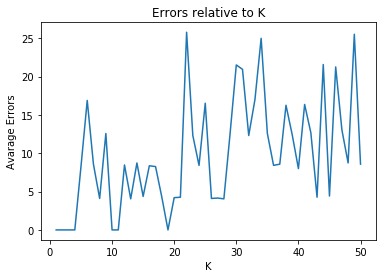

In [93]:
from matplotlib import pyplot as plt

plt.plot(valueOfKListTraining, avarageErrorsListTraining)
plt.xlabel('K')
plt.ylabel('Avarage Errors')
plt.title('Errors relative to K')

plt.show()

Produce your testing error bar plot here:

TypeError: 'builtin_function_or_method' object is not subscriptable

**Remember that all graphs should have axis labels and a title.**

Now, answer a few questions according to what you have observed.

Q1. What is the training accuracy obtained when $k=1$? Explain it.

Q2. Do the testing and training accuracies differ, and why?

Q3. How do the accuracies change as $k$ gets bigger, and why?

### Experiment 3

Compare three 5-NN classifiers using cosine distance.
First, randomly select 100 articles per class and keep these as your testing samples.

In [84]:
from math import sqrt
metric = 'cosine'
#put all indices in a list
indices = range(0, 800) #sample_indices(labels, 200, 200, 200, 200)
initialList = list(indices)

randomTestingIndices=[]

randomTestingIndices1 = sample_indices(labels, 100, 0, 0, 0)
randomTestingIndices2 = sample_indices(labels, 0, 100, 0, 0)
randomTestingIndices3 = sample_indices(labels, 0, 0, 100, 0)
randomTestingIndices4 = sample_indices(labels, 0, 0, 0, 100)
randomTestingIndices.extend(list(randomTestingIndices1))
randomTestingIndices.extend(list(randomTestingIndices2))
randomTestingIndices.extend(list(randomTestingIndices3))
randomTestingIndices.extend(list(randomTestingIndices4))
randomTestingIndices = np.array(randomTestingIndices)

randomList = list(randomTestingIndices)
#perform 'set difference' with list comprehension
trainingList = [x for x in initialList if x not in randomList]

Then do the following:

(1) Train the first classifier using all the remaining articles.
Compute the confusion matrix for the 4 classes using the testing samples.

In [99]:
from sklearn.metrics import confusion_matrix
m1 = knn_classify(data[randomList], data[trainingList], labels[trainingList], metric, k=5)
true1 = []
predicted1 = []
for sample,i in zip(randomTestingIndices1,range(100)):
    true1.append(labels[sample])
    predicted1.append(m1[i])
print("Confusion matrix for first class:")
print(confusion_matrix(np.array(true1), np.array(predicted1)))
    
true2 = []
predicted2 = []
for sample,i in zip(randomTestingIndices2,range(100,200)):
    true2.append(labels[sample])
    predicted2.append(m1[i])
print("Confusion matrix for seecond class:")
print(confusion_matrix(np.array(true2), np.array(predicted2)))
    
true3 = []
predicted3 = []
for sample,i in zip(randomTestingIndices3,range(200,300)):
    true3.append(labels[sample])
    predicted3.append(m1[i])
print("Confusion matrix for third class:")
print(confusion_matrix(np.array(true3), np.array(predicted3)))
    
true4 = []
predicted4 = []
for sample,i in zip(randomTestingIndices4,range(300,400)):
    true4.append(labels[sample])
    predicted4.append(m1[i])
print("Confusion matrix for four class:")
print(confusion_matrix(np.array(true4), np.array(predicted4)))

Confusion matrix for first class:
[[100]]
Confusion matrix for seecond class:
[[100]]
Confusion matrix for third class:
[[ 0  0  0]
 [ 2 96  2]
 [ 0  0  0]]
Confusion matrix for four class:
[[ 0  0]
 [ 1 99]]


(2) Randomly remove 95 training articles from class 1 ("crude").
Train the second classifier using the reduced training samples.
Compute the confusion matrix for the 4 classes using the testing samples.

In [98]:
from math import sqrt
import random
metric = 'cosine'
#put all indices in a list
indices = range(0, 800) #sample_indices(labels, 200, 200, 200, 200)
initialList = list(indices)

randomTestingIndices=[]

randomTestingIndices1 = sample_indices(labels, 100, 0, 0, 0)
randomTestingIndices2 = sample_indices(labels, 0, 100, 0, 0)
randomTestingIndices3 = sample_indices(labels, 0, 0, 100, 0)
randomTestingIndices4 = sample_indices(labels, 0, 0, 0, 100)
randomTestingIndices.extend(list(randomTestingIndices1))
randomTestingIndices.extend(list(randomTestingIndices2))
randomTestingIndices.extend(list(randomTestingIndices3))
randomTestingIndices.extend(list(randomTestingIndices4))
randomTestingIndices = np.array(randomTestingIndices)

randomList = list(randomTestingIndices)
#perform 'set difference' with list comprehension
newTrainingList2 = []
trainingList=[]
trainingList1 = [x for x in initialList if x not in list(randomTestingIndices1)]
trainingList2 = [x for x in initialList if x not in list(randomTestingIndices2)]
trainingList3 = [x for x in initialList if x not in list(randomTestingIndices3)]
trainingList4 = [x for x in initialList if x not in list(randomTestingIndices4)]

newTrainingList2 = random.sample(trainingList2, 5)

trainingList.extend(trainingList1)
trainingList.extend(newTrainingList2)
trainingList.extend(trainingList3)
trainingList.extend(trainingList4)

m2 = knn_classify(data[randomList], data[trainingList], labels[trainingList], metric, k=5)
true1 = []
predicted1 = []
for sample,i in zip(randomTestingIndices1,range(100)):
    true1.append(labels[sample])
    predicted1.append(m2[i])
print("Confusion matrix for first class:")
print(confusion_matrix(np.array(true1), np.array(predicted1)))
    
true2 = []
predicted2 = []
for sample,i in zip(randomTestingIndices2,range(100,200)):
    true2.append(labels[sample])
    predicted2.append(m2[i])
print("Confusion matrix for second class:")
print(confusion_matrix(np.array(true2), np.array(predicted2)))
    
true3 = []
predicted3 = []
for sample,i in zip(randomTestingIndices3,range(200,300)):
    true3.append(labels[sample])
    predicted3.append(m2[i])
print("Confusion matrix for third class:")
print(confusion_matrix(np.array(true3), np.array(predicted3)))
    
true4 = []
predicted4 = []
for sample,i in zip(randomTestingIndices4,range(300,400)):
    true4.append(labels[sample])
    predicted4.append(m2[i])
print("Confusion matrix for fourth class:")
print(confusion_matrix(np.array(true4), np.array(predicted4)))

Confusion matrix for first class:
[[100]]
Confusion matrix for second class:
[[100]]
Confusion matrix for third class:
[[ 0  0  0]
 [ 2 96  2]
 [ 0  0  0]]
Confusion matrix for fourth class:
[[ 0  0]
 [ 1 99]]


(3) Redo (2), but randomly remove 95 training articles from *all* the classes.
Train the third classifier using the new training data.
Compute the confusion matrix for the 4 classes using the testing samples.

In [97]:
from math import sqrt
import random
metric = 'cosine'
#put all indices in a list
indices = range(0, 800) #sample_indices(labels, 200, 200, 200, 200)
initialList = list(indices)

randomTestingIndices=[]

randomTestingIndices1 = sample_indices(labels, 100, 0, 0, 0)
randomTestingIndices2 = sample_indices(labels, 0, 100, 0, 0)
randomTestingIndices3 = sample_indices(labels, 0, 0, 100, 0)
randomTestingIndices4 = sample_indices(labels, 0, 0, 0, 100)
randomTestingIndices.extend(list(randomTestingIndices1))
randomTestingIndices.extend(list(randomTestingIndices2))
randomTestingIndices.extend(list(randomTestingIndices3))
randomTestingIndices.extend(list(randomTestingIndices4))
randomTestingIndices = np.array(randomTestingIndices)

randomList = list(randomTestingIndices)
#perform 'set difference' with list comprehension
newTrainingList2 = []
trainingList=[]
trainingList1 = [x for x in initialList if x not in list(randomTestingIndices1)]
trainingList2 = [x for x in initialList if x not in list(randomTestingIndices2)]
trainingList3 = [x for x in initialList if x not in list(randomTestingIndices3)]
trainingList4 = [x for x in initialList if x not in list(randomTestingIndices4)]

newTrainingList1 = random.sample(trainingList1, 5)
newTrainingList2 = random.sample(trainingList2, 5)
newTrainingList3 = random.sample(trainingList3, 5)
newTrainingList4 = random.sample(trainingList4, 5)


trainingList.extend(newTrainingList1)
trainingList.extend(newTrainingList2)
trainingList.extend(newTrainingList3)
trainingList.extend(newTrainingList4)

m3 = knn_classify(data[randomList], data[trainingList], labels[trainingList], metric, k=5)
true1 = []
predicted1 = []
for sample,i in zip(randomTestingIndices1,range(100)):
    true1.append(labels[sample])
    predicted1.append(m3[i])
print("Confusion matrix for first class:")
print(confusion_matrix(np.array(true1), np.array(predicted1)))
    
true2 = []
predicted2 = []
for sample,i in zip(randomTestingIndices2,range(100,200)):
    true2.append(labels[sample])
    predicted2.append(m3[i])
print("Confusion matrix for second class:")
print(confusion_matrix(np.array(true2), np.array(predicted2)))
    
true3 = []
predicted3 = []
for sample,i in zip(randomTestingIndices3,range(200,300)):
    true3.append(labels[sample])
    predicted3.append(m3[i])
print("Confusion matrix for third class:")
print(confusion_matrix(np.array(true3), np.array(predicted3)))
    
true4 = []
predicted4 = []
for sample,i in zip(randomTestingIndices4,range(300,400)):
    true4.append(labels[sample])
    predicted4.append(m3[i])
print("Confusion matrix for fourth class:")
print(confusion_matrix(np.array(true4), np.array(predicted4)))

Confusion matrix for first class:
[[93  7]
 [ 0  0]]
Confusion matrix for second class:
[[ 0  0  0]
 [ 9 90  1]
 [ 0  0  0]]
Confusion matrix for third class:
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 9 57 27  7]
 [ 0  0  0  0]]
Confusion matrix for fourth class:
[[ 0  0]
 [12 88]]


Repeat the whole thing a few times.
Which of the three classifiers performs the worst?
Try to analyse why this might be.

## 5. Deliverables and Marking

By the deadline, you should submit one single Jupyter file using GitLab.
Please find the coursework submission instruction from the following link:
https://wiki.cs.manchester.ac.uk/index.php/UGHandbook19:Coursework

This exercise is worth 15 marks — marks will be allocated roughly on the basis of:
* rigorous experimentation,
* knowledge displayed when talking to the TA,
* problem solving skill,
* self-learning ability,
* how informative and well presented your graphs are,
* language and ease of reading.

You must be able to explain any code you've written in order to get full marks. During the marking session we will ask you to run all cells in your Jupyter file, so ensure that the file is runnable using the "Restart Kernel and Run All Cells" menu option.

The lab is marked out of 15:

|                          |         |
|:------------------------ |--------:|
| k-NN Implementation      | 3 marks |
| Experiment 1             | 4 marks |
| Experiment 2             | 4 marks |
| Experiment 3             | 4 marks |